# The perceptron and Hebbian Learning
This is a so called jupiter notebook. It allows us to run code interactively. Also we can easily plot plots with the show() or just type fig function.

To activate it just press the run arrow on the left of this cell. It will ask you a few things to install. Do this. It will also ask you which python you want to use. Choose a virtual env.

## The perceptron
A artificial neuron, sometimes called "Perceptron", is a mathematical model of simplified function of a neuron. The simplified function means mapping inputs to output using a liner model and some non-linearity.
Our neuron has inputs and one output.
![1 7pwA1DjBw6JDkwZQecUNiw-2768748088.png](<attachment:1 7pwA1DjBw6JDkwZQecUNiw-2768748088.png>)Source:https://cdn-images-1.medium.com/v2/resize:fit:2000/1*7pwA1DjBw6JDkwZQecUNiw.png

## Training
Based on the input our neuron returns an output. If a given threshold is reached it will return one. The function that calculates the threshold is called activation function.
To get a good result we need to adjust the weights for our inputs. Otherwise each input is as relevant as each other one. But in reality this is not the case.
Due to this we need a learning strategy. For our first example we will use hebbian learning.

## Hebbian learning
Hebbian learning was one of the first methods to train an artificial network. It is based on a simple idea - if the output fires everytime when the input fires, then the connection of that input should be strengthen. If output does not fire when the input fires, then the connection should be strong, but negative. 

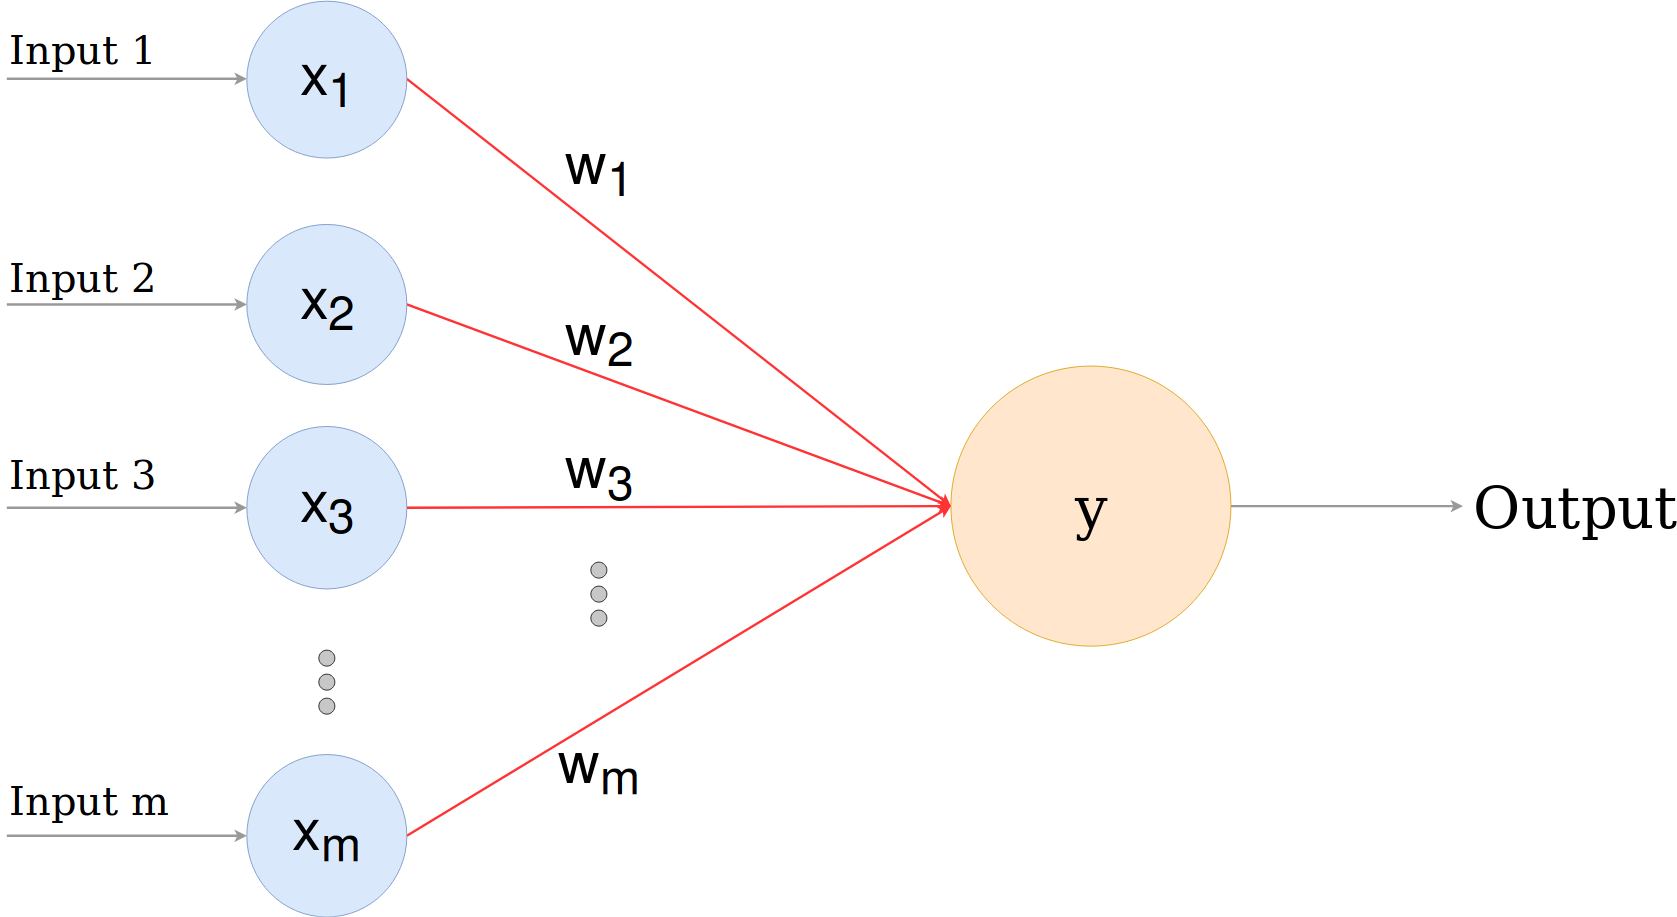

In [ ]:
## To solve our problem we need some packages
# make sure that everything is installed
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
from scipy.special import expit

print('scipy.special.expit is the logistic sigmoid function')

## Generate data
The first thing we have to do is the generation of our data.


In [ ]:
# we need some data
# to make sure that every time we run the code we get the same data we need a seed
np.random.seed(13)

# this line creates 5 random numbers from a normal distribution with mean 1.1 and standard deviation 0.3
x_h = np.random.normal(1.1,0.3,5)
x_e = np.random.normal(1.9,0.4,5)

fig = plt.figure()
ax = fig.subplots()

ax.plot(x_h,np.zeros([5,1]),'co', label="hobbit")
ax.plot(x_e,np.zeros([5,1]),'mo', label="elf")
ax.set_title('Training samples from two different classes')
ax.legend()
ax.set_xlabel('height [m]')
fig.show()

Now we need to add a value to each point. The value represents the class. If it is one the class is hobbit otherwise it is an elf.

In [ ]:
# we add zeros and ones to the values
y_h = np.zeros(x_h.shape)
y_h[:] = 0.0
y_e = np.zeros(x_e.shape)
y_e[:] = +1.0

# and we plot it now with the class labels
fig = plt.figure()
ax = fig.subplots()
ax.plot(x_h,y_h,'co', label="hobbit")
ax.plot(x_e,y_e,'mo', label="elf")
ax.set_title('Training samples from two different classes')
ax.set_xlabel('height [m]')
ax.set_ylabel('y [class id]')
fig

For the training we need to concat all x and all y values together.

In [ ]:
# This is our training data
x_tr = np.concatenate((x_h,x_e))
y_tr = np.concatenate((y_h,y_e))
print(f'The size of x is {x_tr.size}')
print(f'The size of y is {y_tr.size}')

Let's set the initial weights $w_i^t$ for $t=0$: $w_0^0$ and $w_1^0$.

In [ ]:
w0_t = 0
w1_t = 0

Let's calculate the Mean Squared Error (MSE) with the initial weights.

In [ ]:
# Our activation function is this sigmoid function. We imported it from the scipy.special package 
# It is called with the our weights and the x value. 
y_pred = expit(w1_t*x_tr+w0_t)

# The Mean square error is calculated as the sum of the squared differences between the predicted and the true values divided by the number of samples
# Remember the first exercises
MSE = 0

# ploting again
x = np.linspace(0.0,+5.0,50)
ax.set_title(f'Epoch=0 w0={w0_t:.2f} w1={w1_t:.2f} MSE={MSE:.2f}')
ax.plot(x,expit(w1_t*x+w0_t),'b-',label='y=logsig(w1x+w0)')
ax.legend()
fig

And now we want to train. Training means we give the network an input. It will return an output. For comparison we have the "correct" result. We compare the given result with the solution.
To have an effect we will update our weights based on the comparison.

$w_1^t = w_1^t + \alpha * (y_{training} - y) * x$

$w_0^t = w_0^t + \alpha * (y_{training} - y) * 1$

We need a learning rate $\alpha$ as a factor for training. The second formula is called bias term. If you are interested what this do ask me or google it :)

We do this for all points in our trainings set. But doing this only once will not lead to a good result. Therefor we need to do it multiple times. This is called epoches.


In [ ]:
w0_t = 0
w1_t = 0
num_of_epochs = 100
learning_rate = 0.5

# implement hebbian learning and plot after every 20th epoche